# Surface quality measurements using vedo in napari
The [vedo library](https://vedo.embl.es/) offers a set of measurements to describe surfaces. This notebook shows how to use them on surface data in napari.

See also
* [vedo add_quality documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html#vedo.mesh.Mesh.addQuality)

In [1]:
import napari
import matplotlib.pyplot as plt
from napari.utils import nbscreenshot
import numpy as np
import pandas as pd
from napari_process_points_and_surfaces import \
    largest_label_to_surface,\
    filter_smooth_simple,\
    add_quality,\
    Quality

import vedo

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

INFO:xmlschema:Resource 'XMLSchema.xsd' is already loaded
Plugin 'napari-accelerated-pixel-and-object-classification' provided a non-callable type to `napari_experimental_provide_function`: <class 'magicgui._magicgui.MagicFactory'>. Function widget ignored.


In [3]:
from skimage.data import cells3d
nuclei = cells3d()[:,1,60:120,30:80]
nuclei.shape

(60, 60, 50)

INFO:OpenGL.acceleratesupport:No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


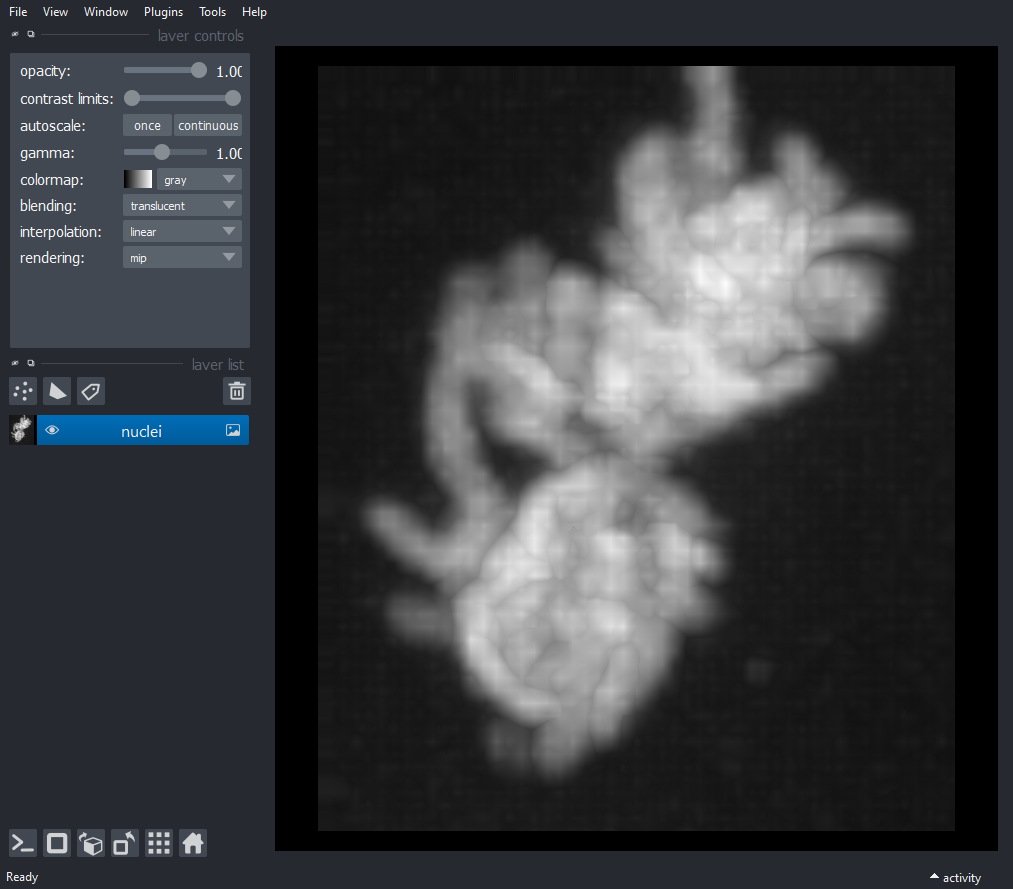

In [4]:
viewer.add_image(nuclei)

nbscreenshot(viewer)

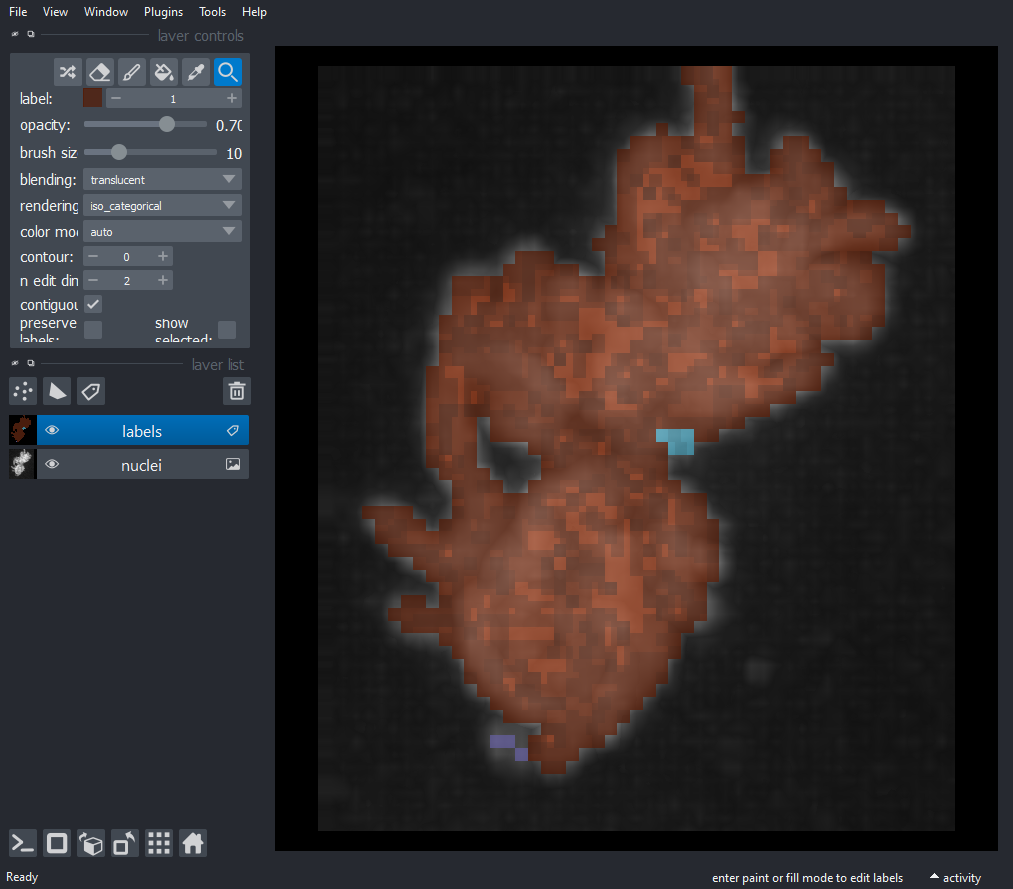

In [5]:
from skimage.measure import label
labels = label(nuclei>20000)

viewer.add_labels(labels)

nbscreenshot(viewer)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Alternative shading modes are only available in 3D, defaulting to none


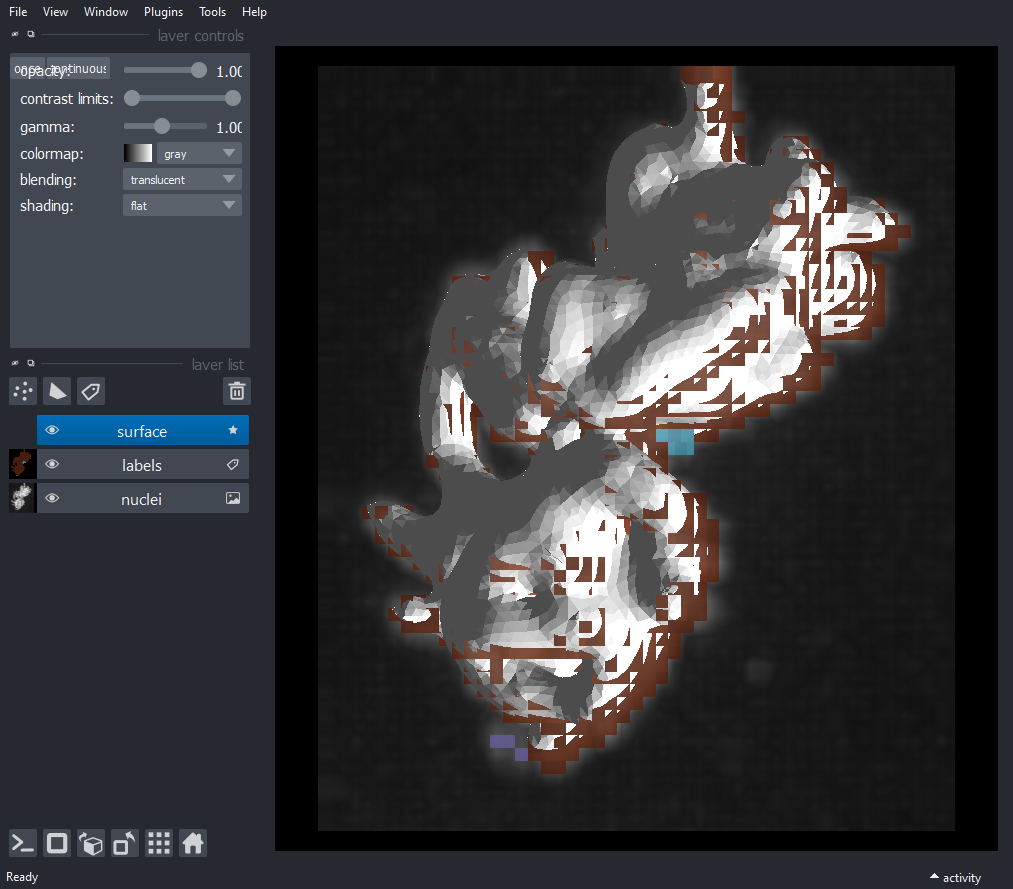

In [6]:
surface = largest_label_to_surface(labels)
surface = filter_smooth_simple(surface, 5)

surface_layer = viewer.add_surface(surface, blending='translucent', shading='flat')
surface = surface_layer.data

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


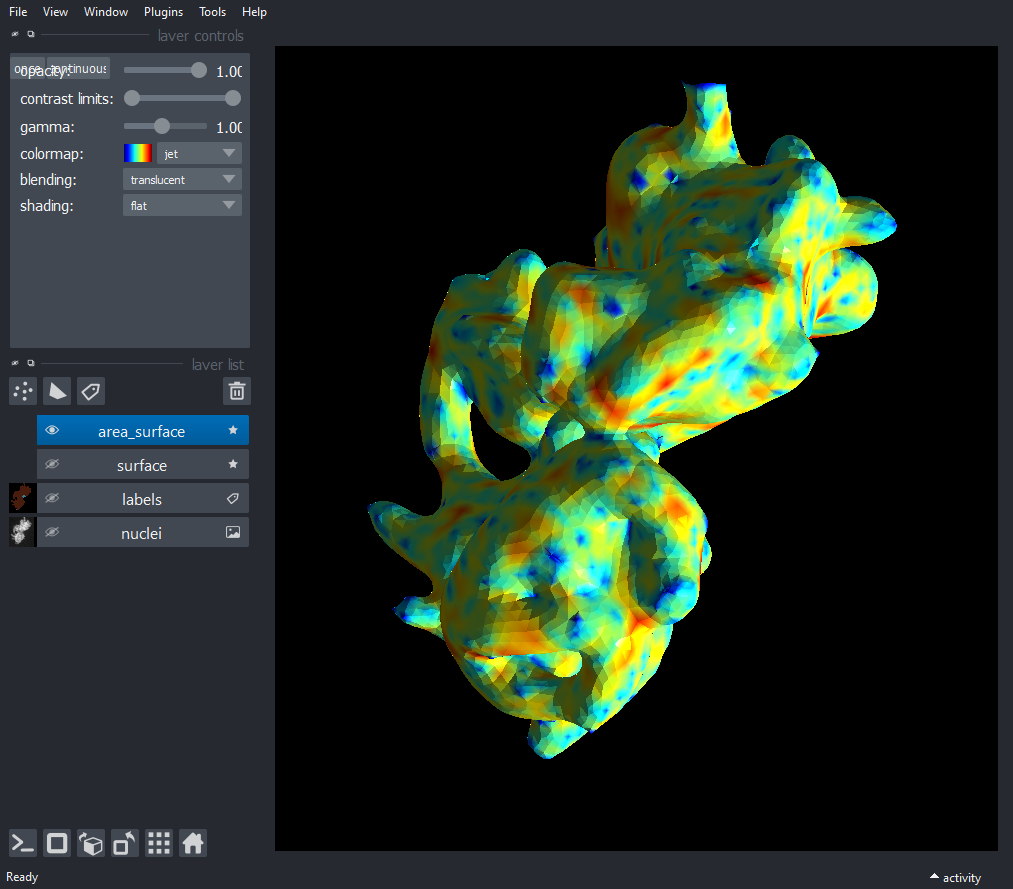

In [7]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.AREA)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


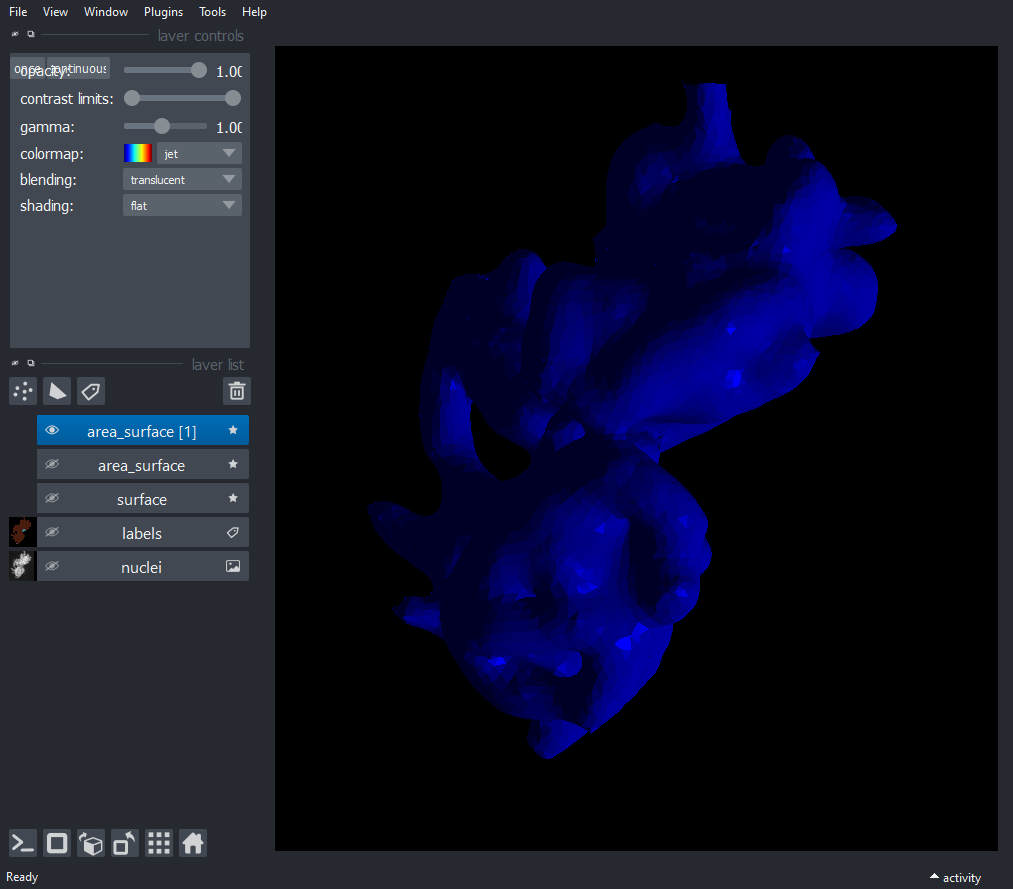

In [8]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.ASPECT_RATIO)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


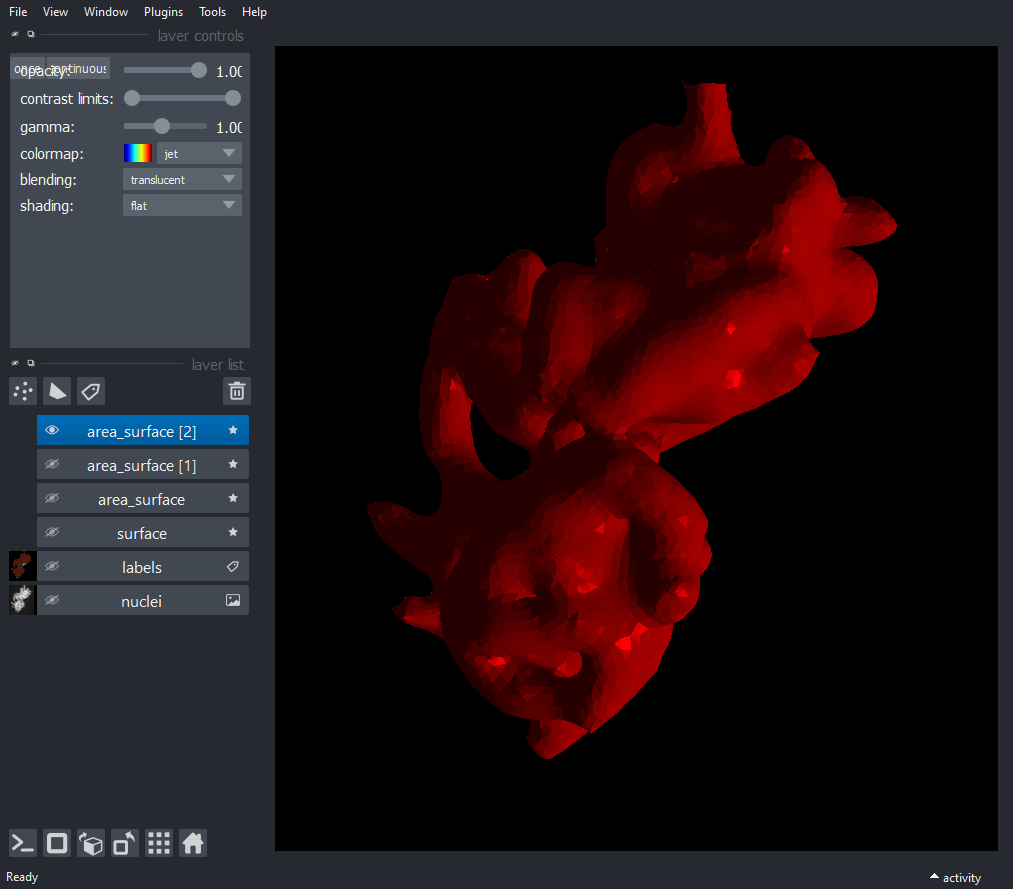

In [9]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.DISTORTION)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


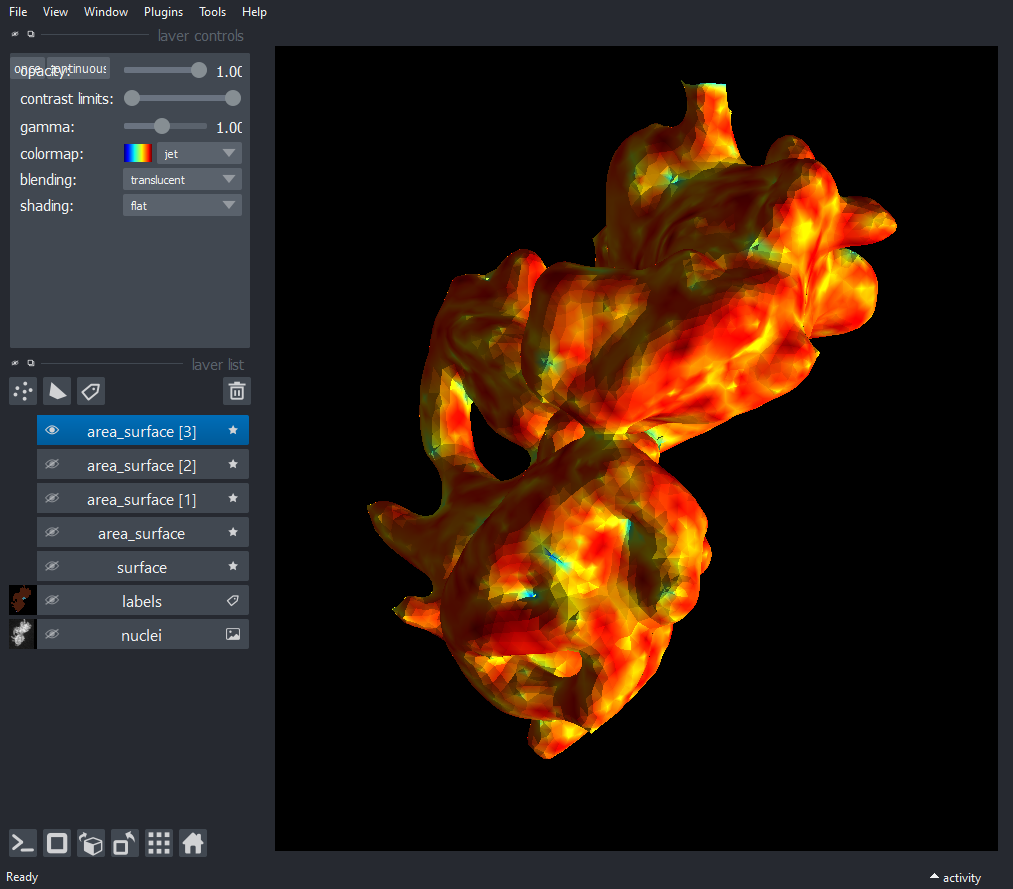

In [10]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.MIN_ANGLE)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


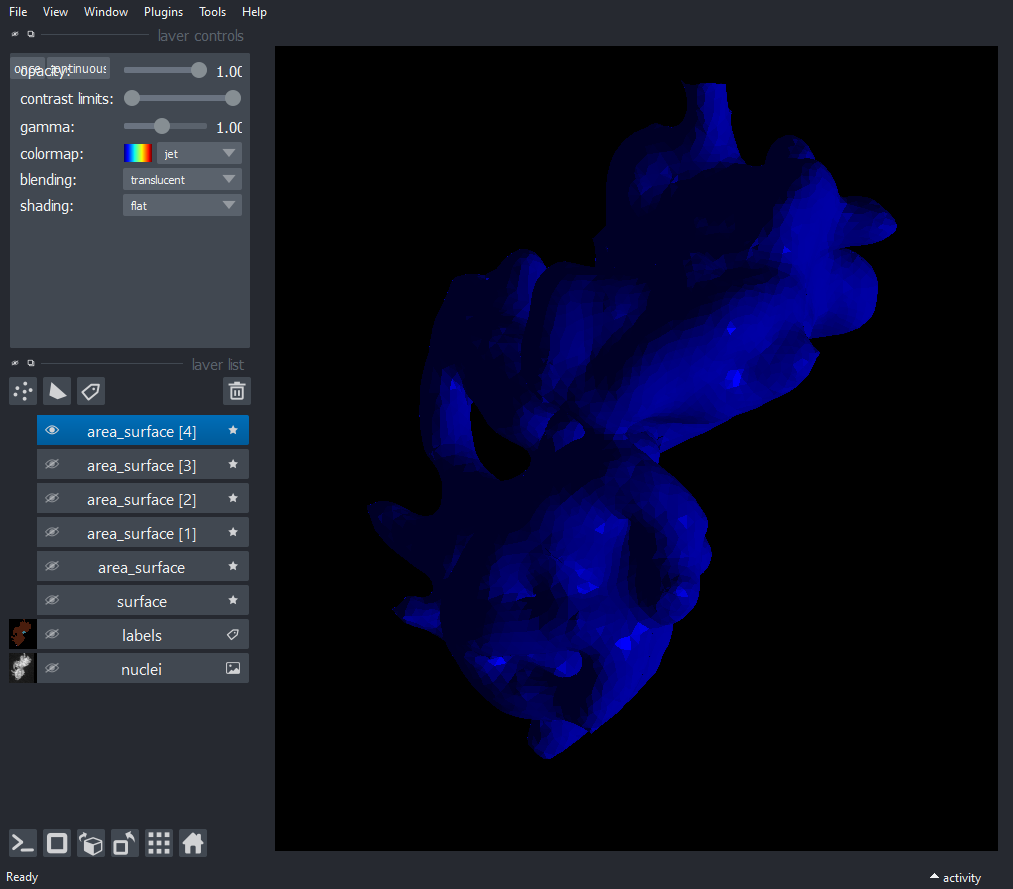

In [11]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.CONDITION)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


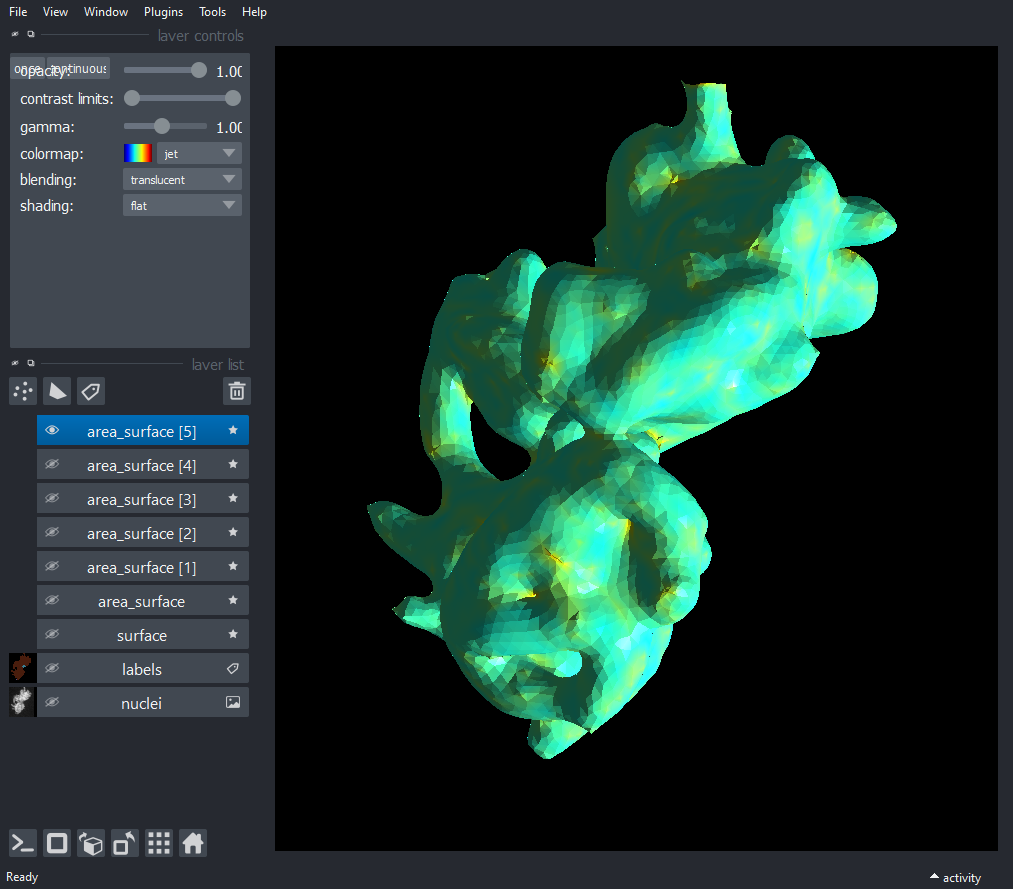

In [12]:
hide_all(viewer)

area_surface = add_quality(surface, quality_id=Quality.MAX_ANGLE)
viewer.add_surface(area_surface, colormap='jet')

nbscreenshot(viewer)

## Reading out values
After measurements have been visualized, you can read them out:

In [13]:
vertices, faces, values = viewer.layers[-1].data

table = {
    "X": vertices[:,2],
    "Y": vertices[:,1],
    "Z": vertices[:,0],
    "value":values
}

pd.DataFrame(table)

X          Y          Z       value
0      31.134338  18.441097  19.974434   68.402433
1      30.506254  18.016391  20.169834   68.797848
2      31.263515  17.741305  20.391741   69.426095
3      31.709577  18.147922  20.247645   71.254333
4      28.216255  19.454636  19.736289   75.737794
...          ...        ...        ...         ...
11693  15.069175  34.687471  58.369267   82.177071
11694  15.635078  34.715079  58.540065   94.142149
11695  15.917136  34.686622  58.559677  104.877727
11696  16.087420  34.931094  58.400351   82.775617
11697  15.539334  35.052325  58.407321   73.460296

[11698 rows x 4 columns]

## Other mesh quality measurements
There are more mesh quality measurements available in vedo. Not all work on all meshes. Watch out for an error message in a grey window.

In [14]:
for q in Quality:
    print(q)

Quality.EDGE_RATIO
Quality.ASPECT_RATIO
Quality.RADIUS_RATIO
Quality.ASPECT_FROBENIUS
Quality.MED_ASPECT_FROBENIUS
Quality.MAX_ASPECT_FROBENIUS
Quality.MIN_ANGLE
Quality.COLLAPSE_RATIO
Quality.MAX_ANGLE
Quality.CONDITION
Quality.SCALED_JACOBIAN
Quality.SHEAR
Quality.RELATIVE_SIZE_SQUARED
Quality.SHAPE
Quality.SHAPE_AND_SIZE
Quality.DISTORTION
Quality.MAX_EDGE_RATIO
Quality.SKEW
Quality.TAPER
Quality.VOLUME
Quality.STRETCH
Quality.DIAGONAL
Quality.DIMENSION
Quality.ODDY
Quality.SHEAR_AND_SIZE
Quality.JACOBIAN
Quality.WARPAGE
Quality.ASPECT_GAMMA
Quality.AREA
Quality.ASPECT_BETA


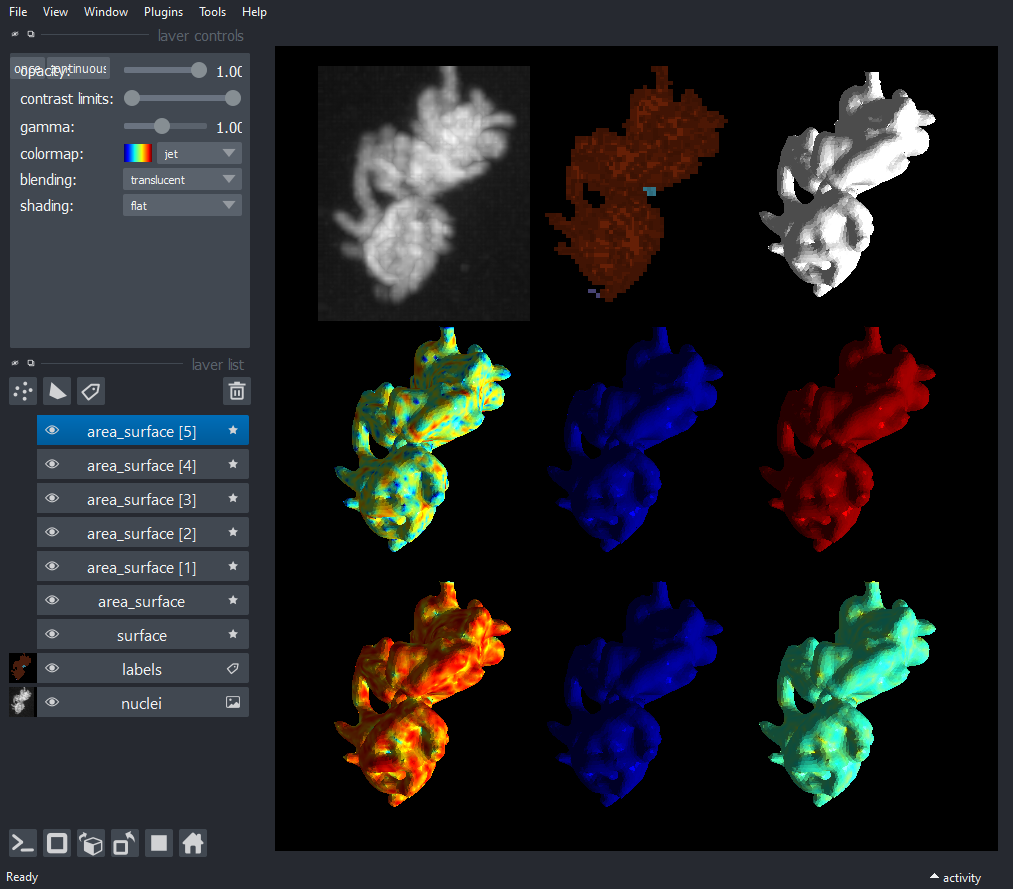

In [15]:
show_all(viewer)
viewer.grid.enabled = True
viewer.grid.stride = -1
nbscreenshot(viewer)